# Non-residential building HVAC system

## Data visualisation

### Import libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels as sm

### Load data

In [2]:
dataset_1 = pd.read_parquet("../../data/clean/building_clean1.parquet.gzip");
dataset_2 = pd.read_parquet("../../data/clean/building_clean2.parquet.gzip");
dataset_3 = pd.read_parquet("../../data/clean/building_clean3.parquet.gzip");
dataset_4 = pd.read_parquet("../../data/clean/building_clean4.parquet.gzip");

### Quick data inspection

In [3]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12376 entries, 0 to 12375
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     12376 non-null  datetime64[ns]
 1   T_Supply      12376 non-null  float64       
 2   T_Return      12376 non-null  float64       
 3   SP_Return     12376 non-null  float64       
 4   T_Saturation  12376 non-null  float64       
 5   T_Outdoor     12376 non-null  float64       
 6   RH_Supply     12376 non-null  float64       
 7   RH_Return     12376 non-null  float64       
 8   RH_Outdoor    12376 non-null  float64       
 9   Energy        12376 non-null  float64       
 10  Power         12376 non-null  float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 1.1 MB


In [4]:
dataset_1.describe()

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
count,12376,12376.000000,12376.000000,12376.000000,12376.000000,12376.000000,12376.000000,12376.000000,12376.000000,12376.000000,12376.000000
mean,2019-12-30 12:52:30,20.902281,19.667908,22.523594,18.455206,11.267889,44.606228,37.508552,75.328458,5.124071,2.047921
min,2019-10-27 02:00:00,14.735000,15.020000,22.500000,13.420000,3.400000,20.260000,13.730000,11.000000,0.000000,0.000000
25%,2019-11-28 07:26:15,17.734999,17.869999,22.500000,17.379999,8.600000,35.867500,29.260000,61.000000,0.000000,0.000000
50%,2019-12-30 12:52:30,19.637500,19.785000,22.500000,17.879999,10.800000,43.669998,36.009998,81.000000,0.000000,0.000000
75%,2020-01-31 18:18:45,24.559999,21.520000,22.500000,19.400000,13.300000,50.799999,45.049999,93.000000,12.000000,4.908000
max,2020-03-03 23:45:00,30.154999,23.889999,23.500000,24.719999,28.900000,75.820000,70.349998,100.000000,14.000000,5.316000
std,NaN,3.696716,2.162947,0.151787,1.741448,3.581817,10.845999,11.115003,21.542901,5.766358,2.307744


In [5]:
dataset_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1824 entries, 12376 to 14199
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     1824 non-null   datetime64[ns]
 1   T_Supply      1824 non-null   float64       
 2   T_Return      1824 non-null   float64       
 3   SP_Return     1824 non-null   float64       
 4   T_Saturation  1824 non-null   float64       
 5   T_Outdoor     1824 non-null   float64       
 6   RH_Supply     1824 non-null   float64       
 7   RH_Return     1824 non-null   float64       
 8   RH_Outdoor    1824 non-null   float64       
 9   Energy        1824 non-null   float64       
 10  Power         1824 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 171.0 KB


In [6]:
dataset_2.describe()

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
count,1824,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000,1824.000000
mean,2020-03-19 11:52:29.999999744,22.557645,20.805463,22.542763,19.775219,14.768147,40.427461,33.685553,64.824836,5.684759,2.281194
min,2020-03-10 00:00:00,17.635000,17.430000,22.500000,16.219999,5.100000,23.779999,16.840000,22.000000,0.000000,0.000000
25%,2020-03-14 17:56:15,19.600000,19.775000,22.500000,18.000000,11.400000,35.399998,28.944999,51.000000,0.000000,0.000000
50%,2020-03-19 11:52:30,21.467500,20.982500,22.500000,19.740000,13.600000,40.884998,34.094999,65.500000,2.000000,0.000000
75%,2020-03-24 05:48:45,25.001250,21.764999,22.500000,21.245000,17.000000,45.799999,39.969997,78.312500,12.000000,5.040000
max,2020-03-28 23:45:00,29.379999,23.695000,23.500000,23.699999,28.299999,53.770000,47.149998,100.000000,15.000000,5.268000
std,NaN,3.395554,1.506494,0.202378,1.814196,4.990192,7.506787,7.380164,17.228513,5.963122,2.392093


In [7]:
dataset_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6616 entries, 14200 to 20815
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     6616 non-null   datetime64[ns]
 1   T_Supply      6616 non-null   float64       
 2   T_Return      6616 non-null   float64       
 3   SP_Return     6616 non-null   float64       
 4   T_Saturation  6616 non-null   float64       
 5   T_Outdoor     6616 non-null   float64       
 6   RH_Supply     6616 non-null   float64       
 7   RH_Return     6616 non-null   float64       
 8   RH_Outdoor    6616 non-null   float64       
 9   Energy        6616 non-null   float64       
 10  Power         6616 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 620.2 KB


In [8]:
dataset_3.describe()

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
count,6616,6616.000000,6616.000000,6616.000000,6616.000000,6616.000000,6616.000000,6616.000000,6616.000000,6616.000000,6616.000000
mean,2020-11-28 12:52:30.000000256,19.926227,19.376080,22.599909,18.232113,11.507973,48.620155,41.186047,83.922310,4.998337,2.000384
min,2020-10-25 02:00:00,12.264999,12.344999,22.500000,12.520000,2.700000,26.889999,24.959999,22.000000,0.000000,0.000000
25%,2020-11-11 07:26:15,16.844999,17.285000,22.500000,16.639999,8.100000,43.907500,36.687499,76.520270,0.000000,0.000000
50%,2020-11-28 12:52:30,19.737499,20.024999,22.500000,17.779999,10.900000,49.180000,41.234999,87.000000,0.000000,0.000000
75%,2020-12-15 18:18:45,21.761250,21.545000,22.500000,20.559999,14.300000,53.320000,45.292497,93.000000,12.000000,4.860000
max,2021-01-01 23:45:00,30.295000,24.344999,23.500000,24.980000,24.299999,65.360001,59.529999,100.000000,15.000000,5.316000
std,NaN,4.103857,2.960168,0.299902,2.535437,4.251131,7.115261,6.678368,13.117871,6.047444,2.420742


In [9]:
dataset_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 21488 to 28687
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     7200 non-null   datetime64[ns]
 1   T_Supply      7200 non-null   float64       
 2   T_Return      7200 non-null   float64       
 3   SP_Return     7200 non-null   float64       
 4   T_Saturation  7200 non-null   float64       
 5   T_Outdoor     7200 non-null   float64       
 6   RH_Supply     7200 non-null   float64       
 7   RH_Return     7200 non-null   float64       
 8   RH_Outdoor    7200 non-null   float64       
 9   Energy        7200 non-null   float64       
 10  Power         7200 non-null   float64       
dtypes: datetime64[ns](1), float64(10)
memory usage: 675.0 KB


In [10]:
dataset_4.describe()

,Timestamp,T_Supply,T_Return,SP_Return,T_Saturation,T_Outdoor,RH_Supply,RH_Return,RH_Outdoor,Energy,Power
count,7200,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000
mean,2021-02-18 11:52:29.999999744,19.110791,20.174545,21.806528,17.875150,11.592062,41.990734,31.175837,67.708611,8.014792,3.202650
min,2021-01-12 00:00:00,12.910000,13.875000,19.500000,12.300000,2.300000,20.090000,11.750000,13.000000,0.000000,0.000000
25%,2021-01-30 17:56:15,17.805000,18.980000,21.500000,16.699999,8.300000,36.399998,25.019999,53.000000,0.000000,0.000000
50%,2021-02-18 11:52:30,19.199999,20.439999,22.500000,17.600000,11.100000,42.384998,31.924999,70.000000,12.000000,4.956000
75%,2021-03-09 05:48:45,20.010000,21.549999,22.500000,19.160000,14.300000,46.910000,36.849998,86.000000,13.000000,5.052000
max,2021-03-27 23:45:00,25.570000,24.820000,22.500000,23.400000,27.799999,63.399998,52.430000,100.000000,15.000000,5.304000
std,NaN,2.066956,1.979482,1.013624,1.944350,4.721014,7.391942,7.874875,20.993557,6.050345,2.423124


### Preliminary observations

- There are no data for the spring and summer months;
- Return temperature setpoints seem to vary very little not only within a dataset, but also across the datasets;
- The outdoor temperature ranges from roughly 2 ºC (cold) to 29 ºC (fairly hot), which seems adequate for this study;
- The relations between the temperature setpoint, the return temperature, the outdoor temperature and the power consumed by the system may contain some valuable information, as an anomaly may affect the HVAC system's ability to follow the setpoint;
- Even though there is no humidity setpoint, the relations between humidity and power may prove to be equally informative.

### Data visualisation - temperature

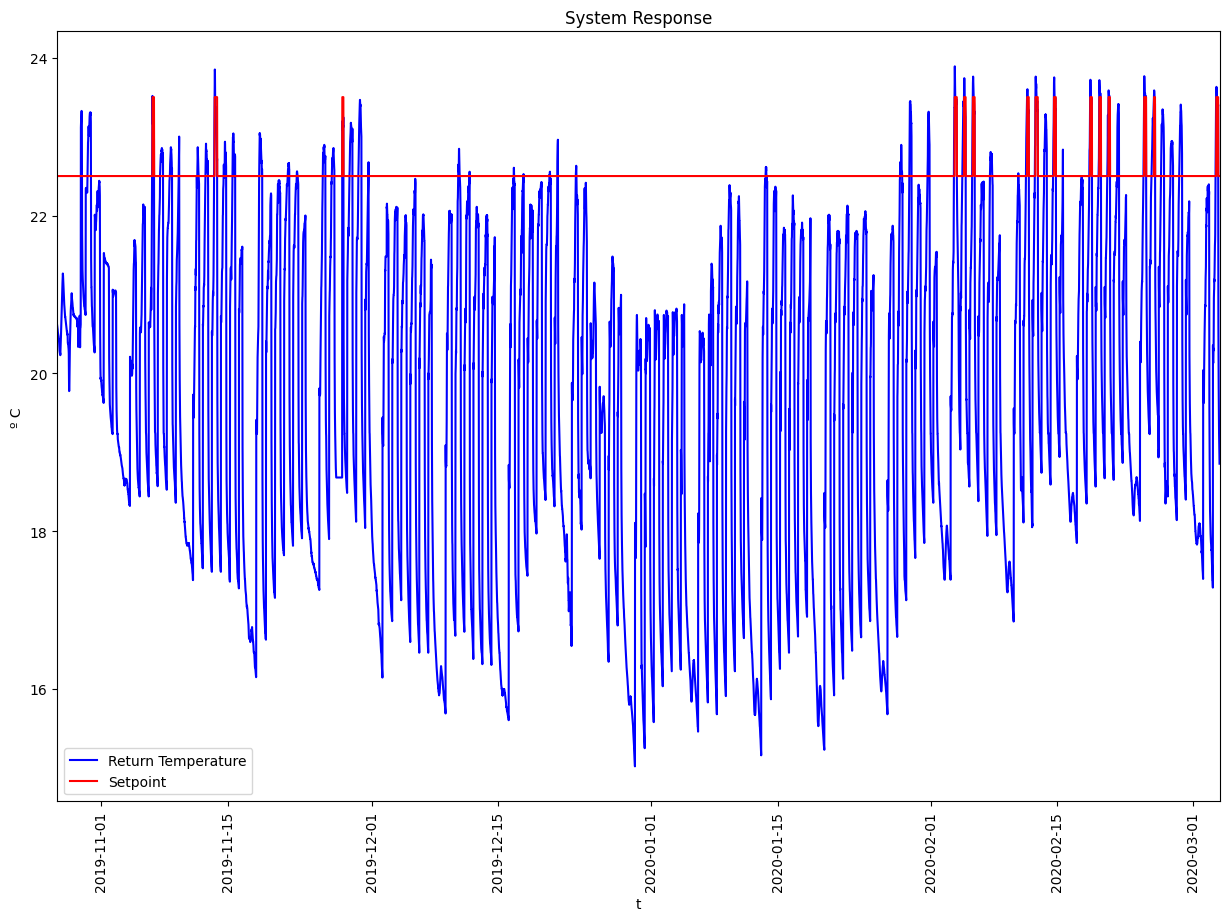

In [32]:
fig, ax = plt.subplots();
fig.set_figheight(10);
fig.set_figwidth(15);
ax.plot(dataset_1["Timestamp"], dataset_1["T_Return"], label="Return Temperature", color="b");
ax.plot(dataset_1["Timestamp"], dataset_1["SP_Return"], label="Setpoint", color="r");
#ax.plot(dataset_1["Timestamp"], dataset_1["T_Outdoor"], label="Outdoor Temperature", color="g");
#ax.plot(dataset_1["Timestamp"], dataset_1["T_Supply"], label="Supply Temperature", color="k");
ax.set_title("System Response");
ax.set_xlabel("t");
ax.set_ylabel("º C");
plt.xticks(rotation=90);
ax.set_xlim(dataset_1["Timestamp"].min(), dataset_1["Timestamp"].max());
ax.legend();
plt.show();

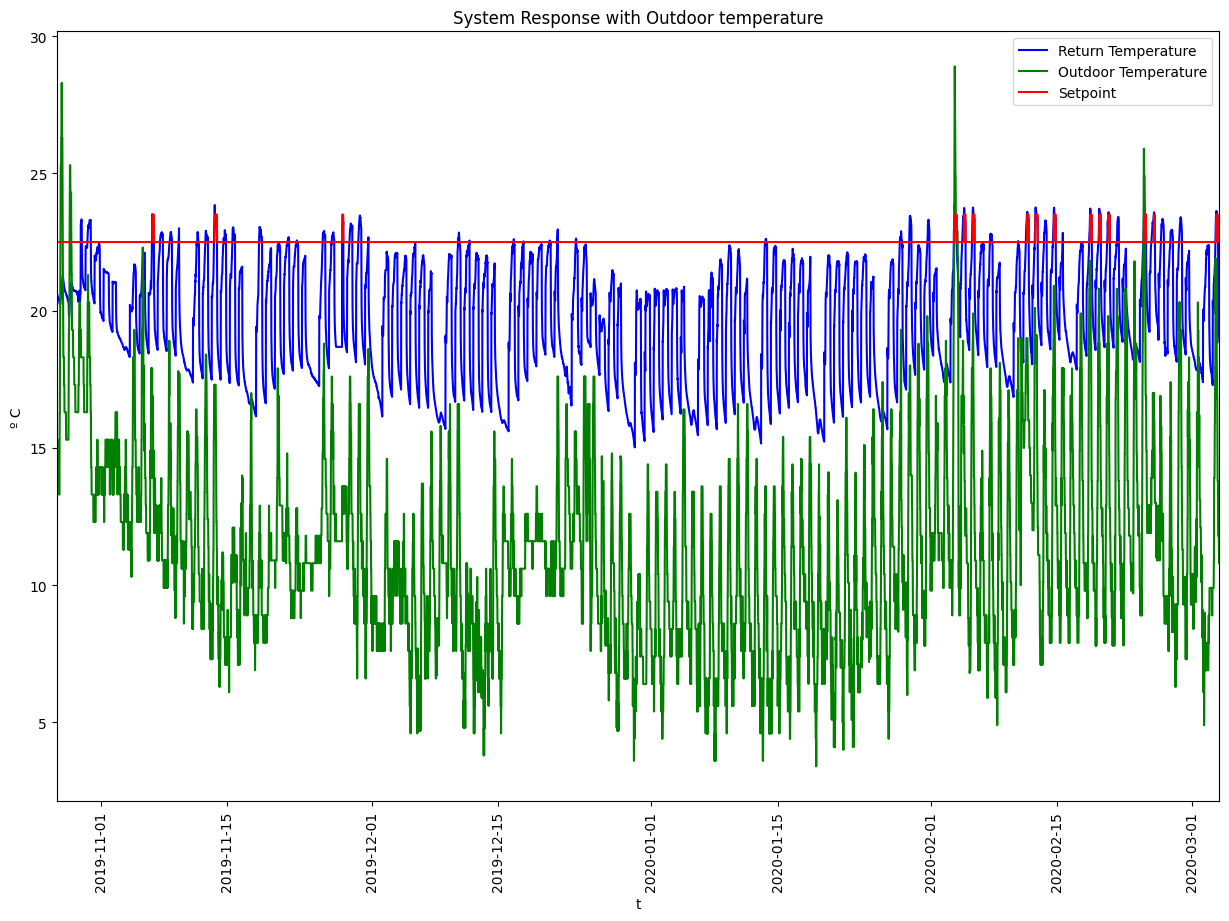

In [40]:
fig, ax = plt.subplots();
fig.set_figheight(10);
fig.set_figwidth(15);
ax.plot(dataset_1["Timestamp"], dataset_1["T_Return"], label="Return Temperature", color="b");
ax.plot(dataset_1["Timestamp"], dataset_1["T_Outdoor"], label="Outdoor Temperature", color="g");
ax.plot(dataset_1["Timestamp"], dataset_1["SP_Return"], label="Setpoint", color="r");
#ax.plot(dataset_1["Timestamp"], dataset_1["T_Supply"], label="Supply Temperature", color="k");
ax.set_title("System Response with Outdoor temperature");
ax.set_xlabel("t");
ax.set_ylabel("º C");
plt.xticks(rotation=90);
ax.set_xlim(dataset_1["Timestamp"].min(), dataset_1["Timestamp"].max());
ax.legend();
plt.show();

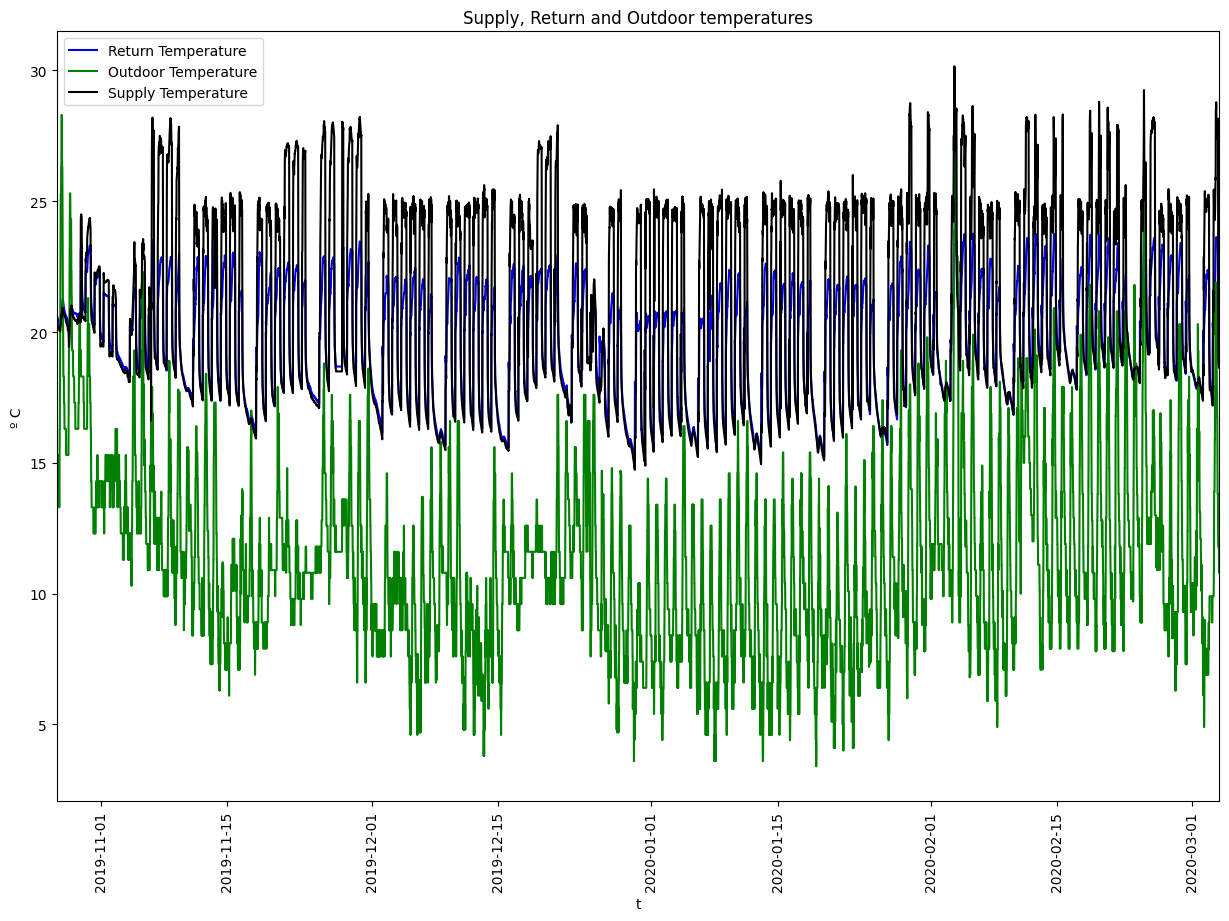

In [39]:
fig, ax = plt.subplots();
fig.set_figheight(10);
fig.set_figwidth(15);
ax.plot(dataset_1["Timestamp"], dataset_1["T_Return"], label="Return Temperature", color="b");
ax.plot(dataset_1["Timestamp"], dataset_1["T_Outdoor"], label="Outdoor Temperature", color="g");
ax.plot(dataset_1["Timestamp"], dataset_1["T_Supply"], label="Supply Temperature", color="k");
ax.set_title("Supply, Return and Outdoor temperatures");
ax.set_xlabel("t");
ax.set_ylabel("º C");
plt.xticks(rotation=90);
ax.set_xlim(dataset_1["Timestamp"].min(), dataset_1["Timestamp"].max());
ax.legend();
plt.show();

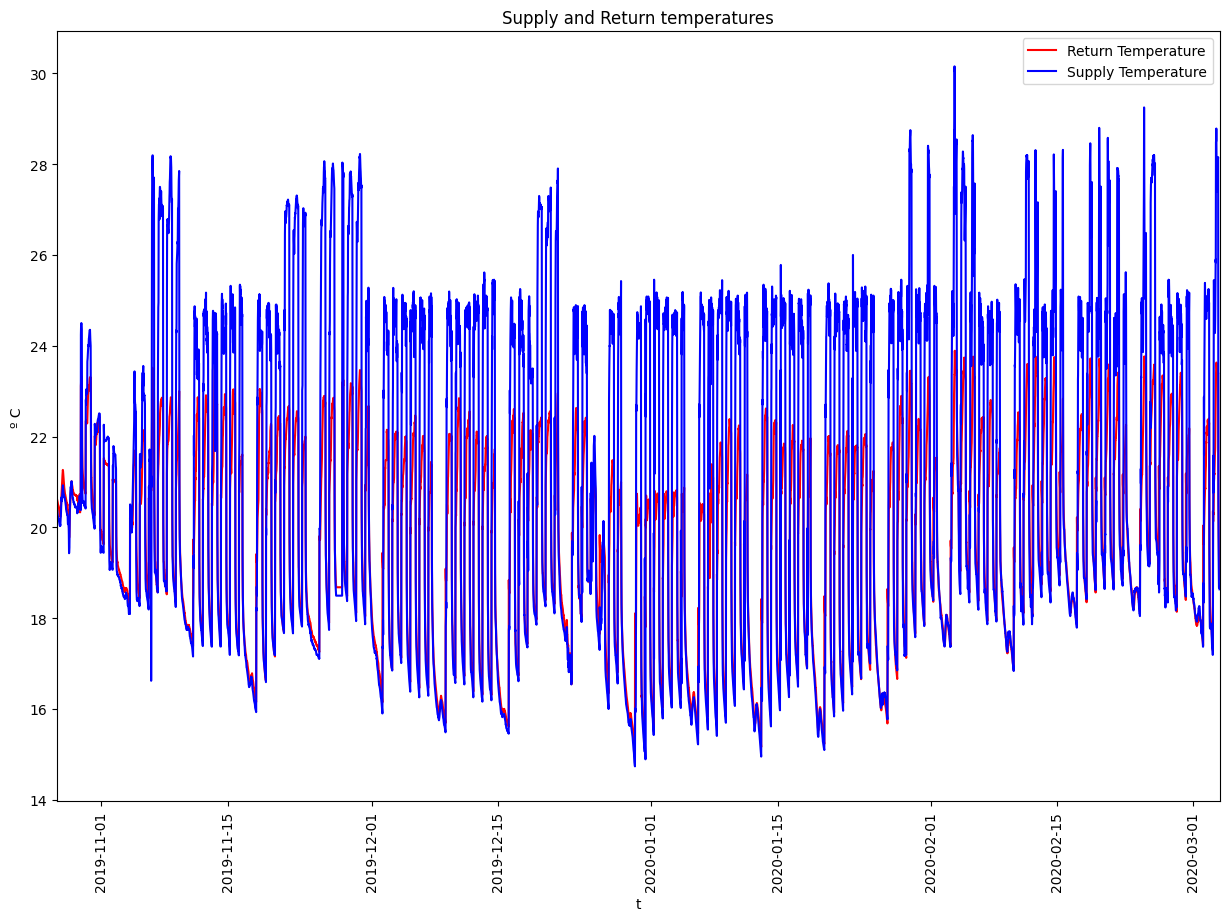

In [38]:
fig, ax = plt.subplots();
fig.set_figheight(10);
fig.set_figwidth(15);
ax.plot(dataset_1["Timestamp"], dataset_1["T_Return"], label="Return Temperature", color="r");
ax.plot(dataset_1["Timestamp"], dataset_1["T_Supply"], label="Supply Temperature", color="b");
ax.set_title("Supply and Return temperatures");
ax.set_xlabel("t");
ax.set_ylabel("º C");
plt.xticks(rotation=90);
ax.set_xlim(dataset_1["Timestamp"].min(), dataset_1["Timestamp"].max());
ax.legend();
plt.show();

#### Some observations

- Some spikes in the return temperature setpoint are visible in this plot for dataset 1. These coincide with spikes in the return air temperature, which indicates that the system responds appropriately in these occasions. However, there are some return air temperature spikes that do not correspond to any setpoint spikes. These could be caused by either weather conditions or system malfunctions;

- There are clear seasonal patterns in supply and return air temperatures. These were to be expected due to daily swings of temperature. A frequency-domain analysis may be of use. Still, maybe some anomalies can be detected by analysing these patterns, as they don't always seem to coincide with outdoor temperature swings;

- As expected, the system is running as a heating unit, as the supply temperature is higher than the return temperature. Discrepancies in these two signals' peaks or shapes may hint at a heating unit (e.g. coil) malfunction.

### Data visualisation - humidity

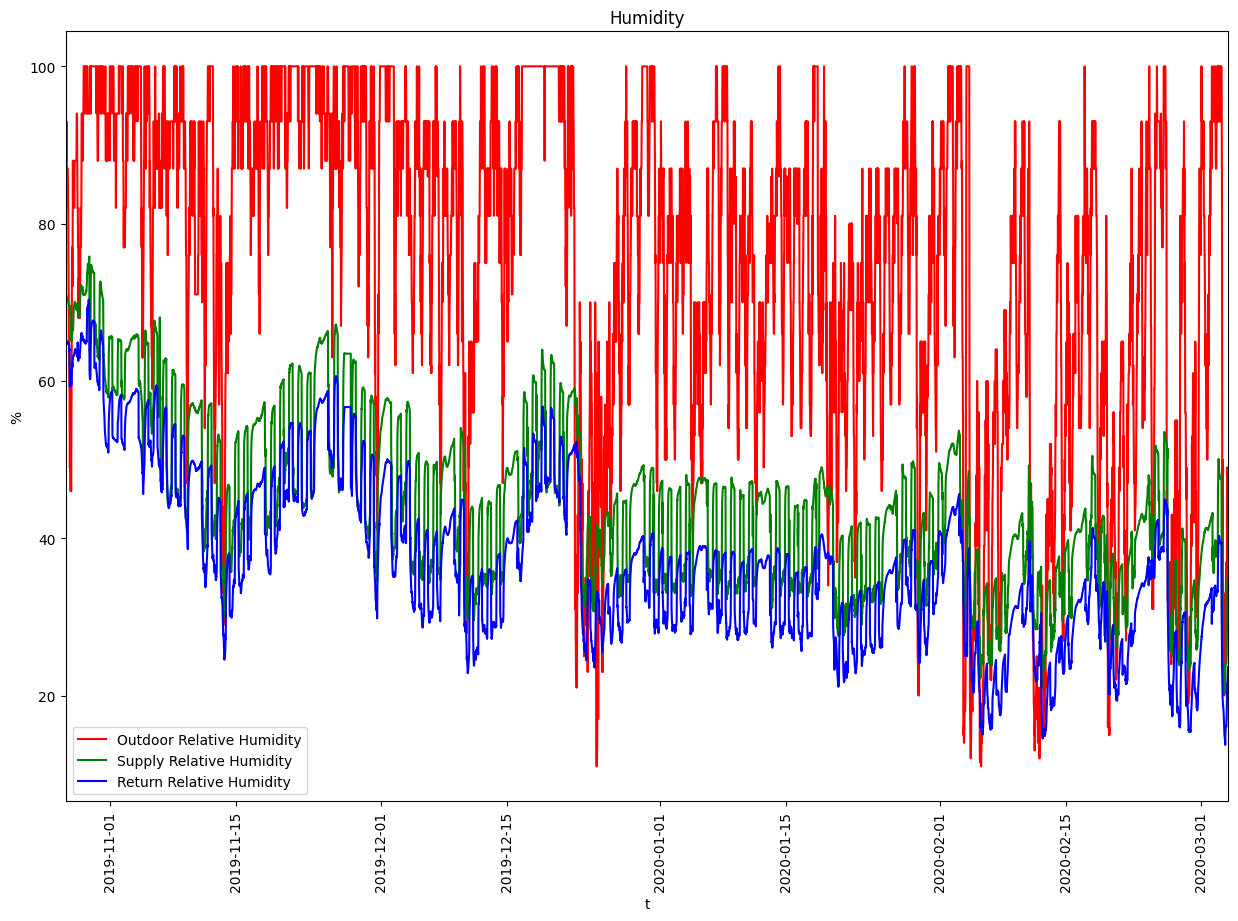

In [43]:
fig, ax = plt.subplots();
fig.set_figheight(10);
fig.set_figwidth(15);
ax.plot(dataset_1["Timestamp"], dataset_1["RH_Outdoor"], label="Outdoor Relative Humidity", color="r");
ax.plot(dataset_1["Timestamp"], dataset_1["RH_Supply"], label="Supply Relative Humidity", color="g");
ax.plot(dataset_1["Timestamp"], dataset_1["RH_Return"], label="Return Relative Humidity", color="b");
ax.set_title("Humidity");
ax.set_xlabel("t");
ax.set_ylabel("%");
plt.xticks(rotation=90);
ax.set_xlim(dataset_1["Timestamp"].min(), dataset_1["Timestamp"].max());
ax.legend();
plt.show();

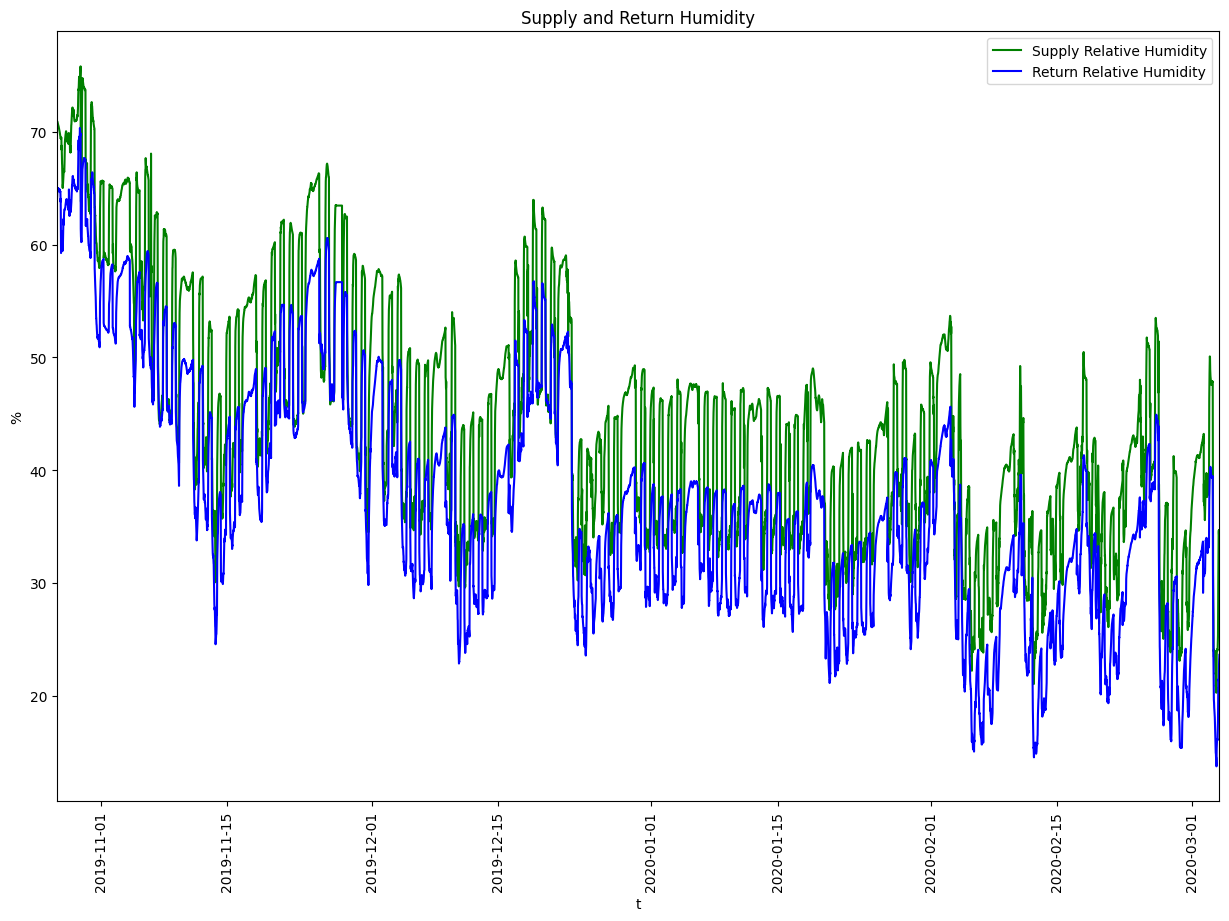

In [44]:
fig, ax = plt.subplots();
fig.set_figheight(10);
fig.set_figwidth(15);
ax.plot(dataset_1["Timestamp"], dataset_1["RH_Supply"], label="Supply Relative Humidity", color="g");
ax.plot(dataset_1["Timestamp"], dataset_1["RH_Return"], label="Return Relative Humidity", color="b");
ax.set_title("Supply and Return Humidity");
ax.set_xlabel("t");
ax.set_ylabel("%");
plt.xticks(rotation=90);
ax.set_xlim(dataset_1["Timestamp"].min(), dataset_1["Timestamp"].max());
ax.legend();
plt.show();

#### Some observations

- As expected, the values for outdoor humidity are much higher. Either the air handling unit is equipped with a dehumidifier, or this is simply the result of the increase in temperature;

- There seems to be a clear downward trend in the supply and return humidity values. The initial values seem a bit too high for thermal comfort, though the supply temperature was also a little lower than in the rest of the series. The final values, on the other end, seem dangerously low, and this can't be attributed to an increase in supply air temperature;

- There seem to be very few discrepancies in the supply air and return air humidities. Though these could be the sign of a malfunction, this seems less likely than on the temperature case, as there is no information on the HVAC systems' components.

### Data visualisation - Power

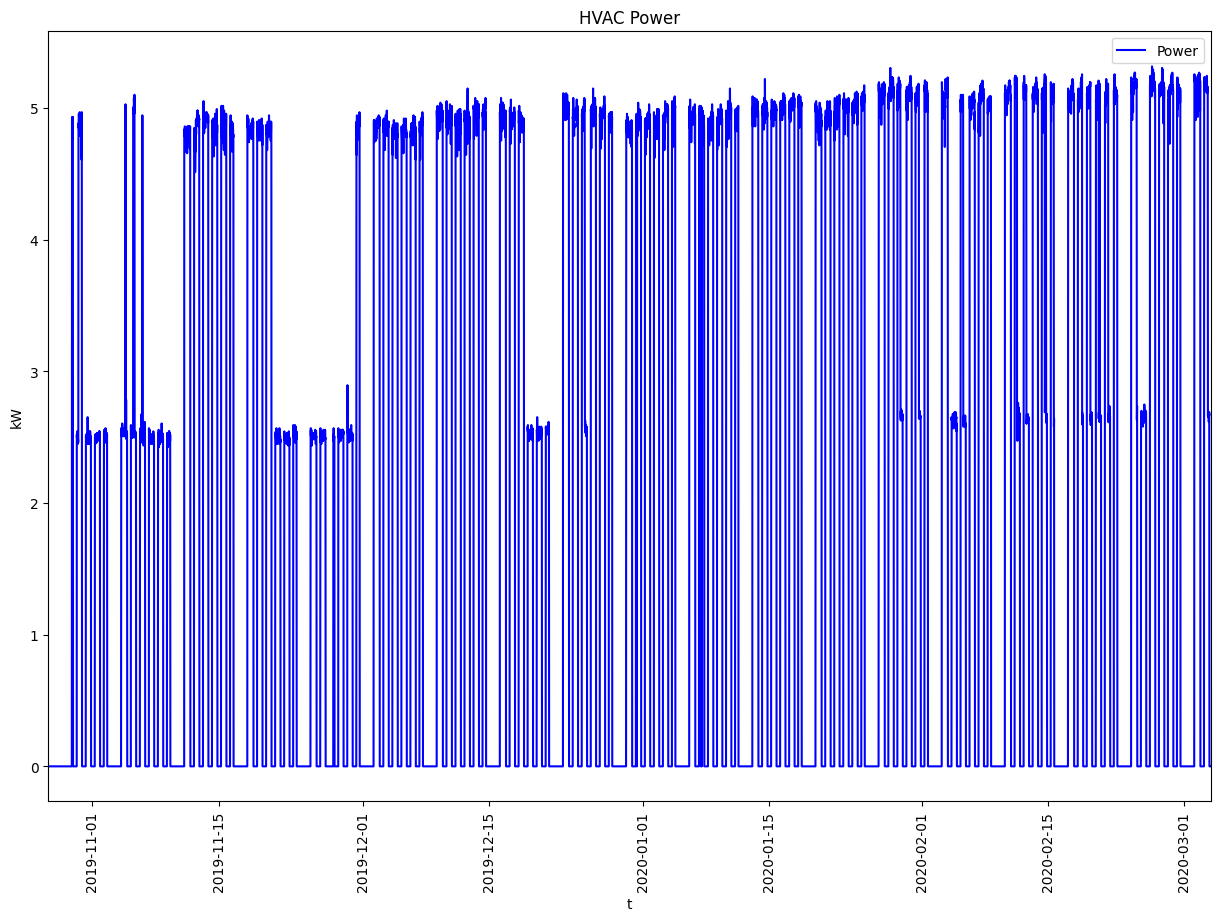

In [45]:
fig, ax = plt.subplots();
fig.set_figheight(10);
fig.set_figwidth(15);
ax.plot(dataset_1["Timestamp"], dataset_1["Power"], label="Power", color="b");
ax.set_title("HVAC Power");
ax.set_xlabel("t");
ax.set_ylabel("kW");
plt.xticks(rotation=90);
ax.set_xlim(dataset_1["Timestamp"].min(), dataset_1["Timestamp"].max());
ax.legend();
plt.show();

#### Some observations

- It seems the unit has 3 operational modes: off, half-power, full-power;

- These patterns seem far more irregular (could they be related to weather conditions?);

- It will be interesting to see whether the peaks correspond to temperature and/or humidity peaks. If this happens often but not always, that may be the sign of an anomaly;

- Additionaly, if the power needed to keep the supply temperature at a certain value for the same outdoor temperature values varies, this could be indicative of an anomaly as well.

### Data visualisation - combined

Previous normalisation is required if we are to plot different physical quantities. Since this will only be used for data visualisation purposes, there is no danger of data leakage.

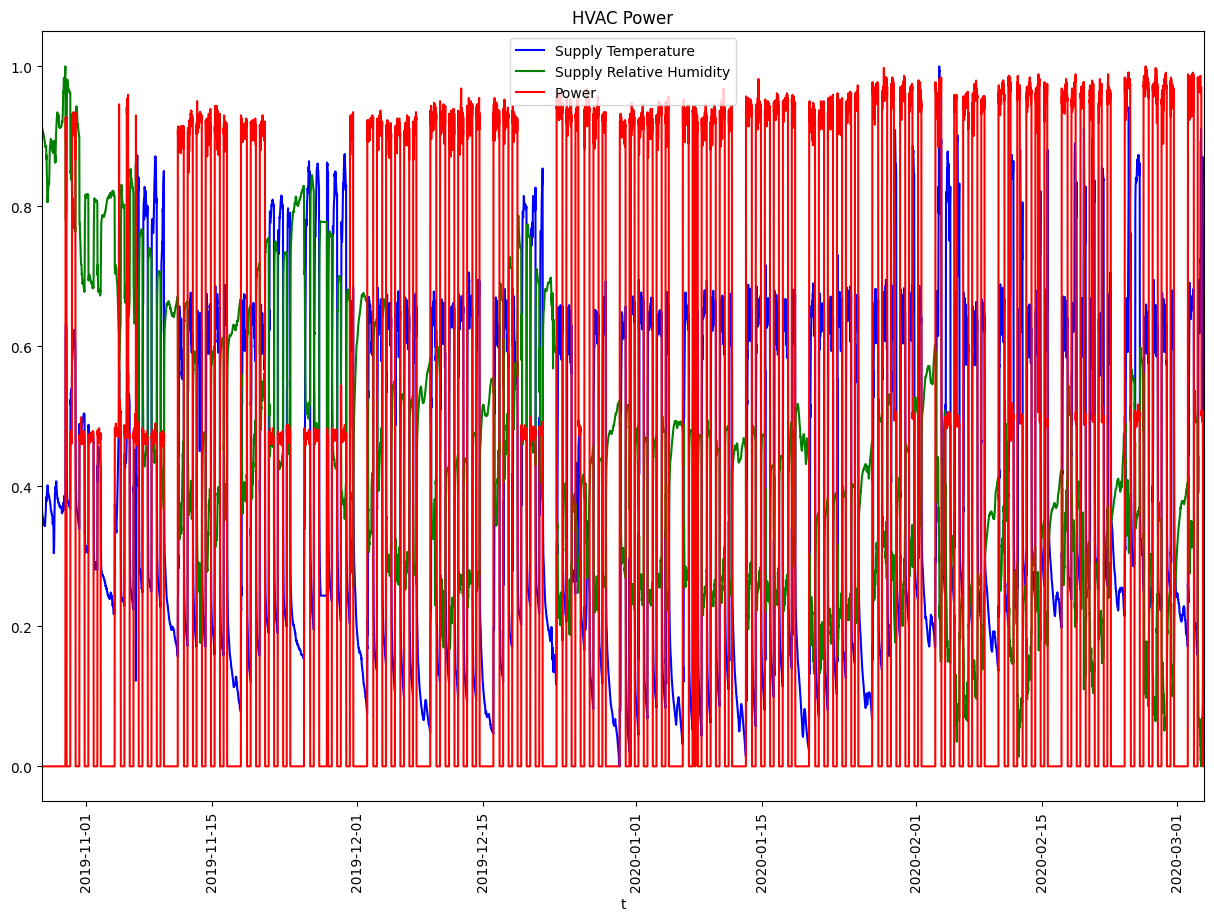

In [50]:
fig, ax = plt.subplots();
fig.set_figheight(10);
fig.set_figwidth(15);
ax.plot(dataset_1["Timestamp"], (dataset_1["T_Supply"] - dataset_1["T_Supply"].min()) / (dataset_1["T_Supply"].max() - dataset_1["T_Supply"].min()), label="Supply Temperature", color="b");
ax.plot(dataset_1["Timestamp"], (dataset_1["RH_Supply"] - dataset_1["RH_Supply"].min()) / (dataset_1["RH_Supply"].max() - dataset_1["RH_Supply"].min()), label="Supply Relative Humidity", color="g");
ax.plot(dataset_1["Timestamp"], (dataset_1["Power"] - dataset_1["Power"].min()) / (dataset_1["Power"].max() - dataset_1["Power"].min()), label="Power", color="r");
ax.set_title("HVAC Power");
ax.set_xlabel("t");
plt.xticks(rotation=90);
ax.set_xlim(dataset_1["Timestamp"].min(), dataset_1["Timestamp"].max());
ax.legend();
plt.show();

#### Some observations

- Whenever the HVAC is unit is turned off, a sharp decrease in temperature and a slower but significant increase in relative humidity seems to take place, as expected;

- Discrepancies between power and temperature peaks could indicate anomalies, as well as differences in the power needed to maintain a certain temperature at the same outdoor temperature (these are contextual anomalies, as they would also depend on the state of the system);

- Other interesting combinations: power, supply temperature and outdoor temperature; power, supply relative humidity and outdoor relative humidity;

- Other interesting plots: seasonal plots for multiple variables (e.g. weekdays on the x-axis for every week in the dataset, or days on the x-axis for every month in the dataset); plot the differenced series; plot trajectories.